# Causal Discovery Toy Example

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Set Seed for Reproducability

In [2]:
SEED = 432432
np.random.seed(SEED)

# Synthetic Data Generation (Linear)

          Z         T         Y
0  0.344196  0.465137  1.466295
1  0.290006  1.263568  2.837287
2  0.407479  1.049445  3.067160
3  0.512762  1.487321  4.147852
4  0.965230  1.210708  3.559515


<Axes: title={'center': 'Generated Data (Outcome)'}>

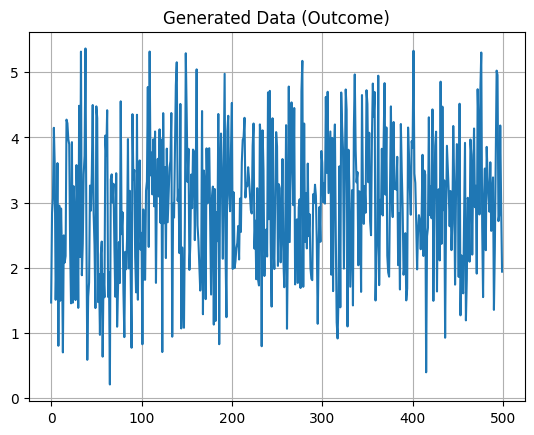

In [3]:
NUM_SAMPLES = 500

# (CONFOUNDER)
Z = np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#Z = np.random.normal(size=NUM_SAMPLES) # Gaussian

# (CONTINUOUS TREATMENT)
T = Z + np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#T = Z + np.random.normal(size=NUM_SAMPLES) # Gaussian

# (OUTCOME)
Y = 2 * T + Z + np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#Y = 2 * T + Z + np.random.normal(size=NUM_SAMPLES) # Gaussian

df_linear = pd.DataFrame({'Z': Z, 'T': T, 'Y': Y})

print(df_linear.head())

df_linear['Y'].plot(grid='on', title='Generated Data (Outcome)')

# Model (Linear)

In [4]:
model_linear = lingam.DirectLiNGAM(random_state=SEED)

model_linear.fit(df_linear)

In [5]:
model_linear.causal_order_

[np.int64(0), np.int64(1), np.int64(2)]

In [6]:
model_linear.adjacency_matrix_

array([[0.        , 0.        , 0.        ],
       [0.97569745, 0.        , 0.        ],
       [1.13694397, 1.93314621, 0.        ]])

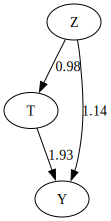

In [7]:
make_dot(model_linear.adjacency_matrix_, labels=list(df_linear.columns))

# Model (Non-Linear)

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

reg = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=SEED)
#reg = GradientBoostingRegressor(n_estimators=50, max_depth=4, random_state=SEED)

model_nonlinear = lingam.RESIT(regressor=reg, random_state=SEED)
model_nonlinear.fit(df_linear)

In [9]:
model_nonlinear.causal_order_

[np.int64(0), np.int64(2), np.int64(1)]

In [10]:
model_nonlinear.adjacency_matrix_

array([[0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

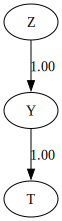

In [11]:
make_dot(model_nonlinear.adjacency_matrix_, labels=list(df_linear.columns))

# Synthetic Data Generation (Non-Linear)

          Z         T         Y
0  0.639542  1.265978  3.102171
1  0.014185  0.410140  0.290583
2  0.421491  0.474336  0.305313
3  0.350415  0.459898  0.514753
4  0.391537  1.063265  1.936895


<Axes: title={'center': 'Generated Data (Outcome)'}>

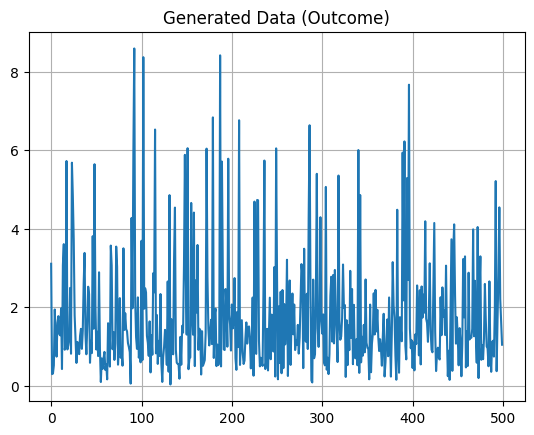

In [12]:
NUM_SAMPLES = 500

# (CONFOUNDER)
Z = np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#Z = np.random.normal(size=NUM_SAMPLES) # Gaussian

# (CONTINUOUS TREATMENT)
T = Z ** 2 + np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#T = Z ** 2 + np.random.normal(size=NUM_SAMPLES) # Gaussian

# (OUTCOME)
Y = T**3 + Z**2 + np.random.uniform(size=NUM_SAMPLES) # Non-Gaussian
#Y = T**3 + Z**2 + np.random.normal(size=NUM_SAMPLES) # Non-Gaussian

df_nonlinear = pd.DataFrame({'Z': Z, 'T': T, 'Y': Y})

print(df_nonlinear .head())

df_nonlinear['Y'].plot(grid='on', title='Generated Data (Outcome)')

# Model (Linear)

In [13]:
model_linear = lingam.DirectLiNGAM(random_state=SEED)

model_linear.fit(df_nonlinear)

In [14]:
model_linear.causal_order_

[np.int64(2), np.int64(1), np.int64(0)]

In [15]:
model_linear.adjacency_matrix_

array([[0.        , 0.11770131, 0.10979044],
       [0.        , 0.        , 0.24156392],
       [0.        , 0.        , 0.        ]])

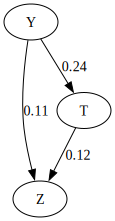

In [16]:
make_dot(model_linear.adjacency_matrix_, labels=list(df_nonlinear.columns))

# Model (Non-Linear)

In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

reg = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=SEED)
#reg = GradientBoostingRegressor(n_estimators=50, max_depth=4, random_state=SEED)

model_nonlinear = lingam.RESIT(regressor=reg, random_state=SEED)
model_nonlinear.fit(df_nonlinear)

In [18]:
model_nonlinear.causal_order_

[np.int64(0), np.int64(1), np.int64(2)]

In [19]:
model_nonlinear.adjacency_matrix_

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

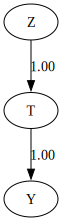

In [20]:
make_dot(model_nonlinear.adjacency_matrix_, labels=list(df_nonlinear.columns))

# Evaluation

In [21]:
# LINEAR DATA, LINEAR MODEL
lingam.utils.evaluate_model_fit(model_linear.adjacency_matrix_, df_linear)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,4,445.004407,0.0,1665.242267,0.734533,0.732769,0.732769,0.732769,0.734533,0.470047,2.219982,10.649199,0.890009


In [22]:
# LINEAR DATA, NON-LINEAR MODEL
lingam.utils.evaluate_model_fit(model_nonlinear.adjacency_matrix_, df_linear)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,4,913.330874,0.0,1665.242089,0.45262,0.451533,0.451533,0.451533,0.45262,0.674964,0.346677,8.775893,1.826662


In [23]:
# NON-LINEAR DATA, LINEAR MODEL
lingam.utils.evaluate_model_fit(model_linear.adjacency_matrix_, df_nonlinear)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,4,0.000023,1.0,1129.642839,1.003554,1.0,1.0,1.0,1.003554,0,4.0,12.429216,4.687984e-08


In [24]:
# NON-LINEAR DATA, NON-LINEAR MODEL
lingam.utils.evaluate_model_fit(model_nonlinear.adjacency_matrix_, df_nonlinear)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,4,565.62557,0.0,1129.642869,0.501062,0.499288,0.499288,0.499288,0.501062,0.530448,1.737498,10.166714,1.131251
